In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('husl')
plt.style.context('ggplot')


from scipy import stats
import statsmodels.api as sm

from __future__ import division
import math

In [2]:
df_99 = pd.read_csv('Trial_99_Cleaned')
df_51 = pd.read_csv('Trial_051_Cleaned')

## The Overall Experience 

### Trial 99:



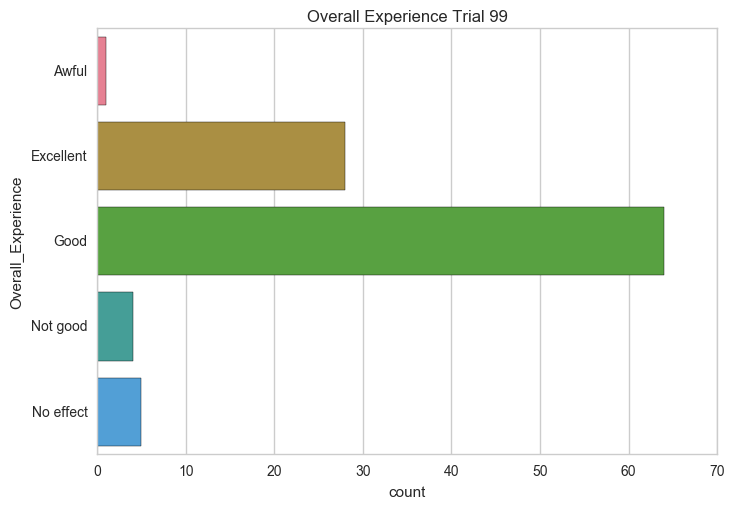

In [3]:
sns.countplot(y="Overall_Experience", data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'])
plt.title('Overall Experience Trial 99')


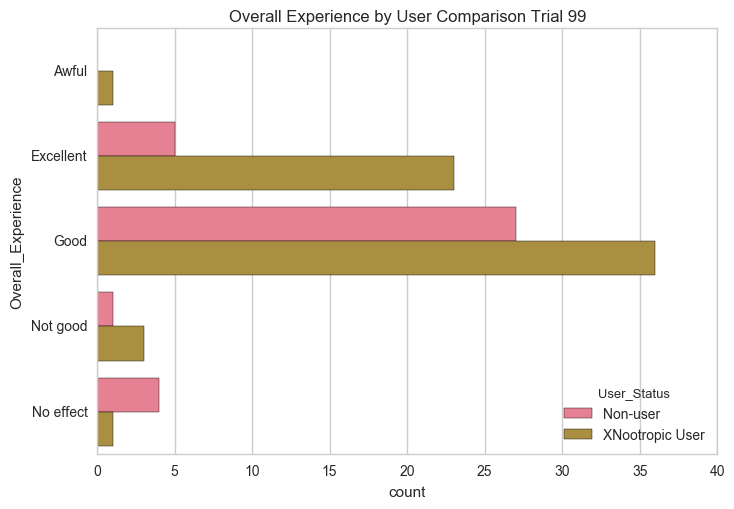

In [4]:
sns.countplot(y="Overall_Experience",hue='User_Status', data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'] )
plt.title('Overall Experience by User Comparison Trial 99')

In [5]:
T99_cont_table1 = pd.crosstab(columns=df_99.Overall_Experience, index=df_99.User_Status, margins=True)
T99_cont_table1

Overall_Experience,Awful,Excellent,Good,No effect,Not good,All
User_Status,,,,,,
Non-user,0,5,27,4,1,37
XNootropic User,1,23,36,1,3,64
All,1,28,63,5,4,101


In [6]:
T99_cont_table = pd.crosstab(index=df_99.Overall_Experience, columns=df_99.User_Status)
T99_cont_table

User_Status,Non-user,XNootropic User
Overall_Experience,,
Awful,0,1
Excellent,5,23
Good,27,36
No effect,4,1
Not good,1,3


## Determining if the non-users and nootropic users have different answers for overall experience


$H_o$ : Non-users and Nootropic users have typically answer their overall experience the same.

$H_A$ : Non-users and Nootropic users have different answers based on their overall experience. 

In [25]:
x = T99_cont_table.loc[:, 'Non-user']
y = T99_cont_table.loc[:, 'XNootropic User']

stats.mannwhitneyu(x,y, alternative='two-sided')

MannwhitneyuResult(statistic=11.0, pvalue=0.83251881267927552)

In [7]:
pd.crosstab(columns=df_99['Overall_Experience'], index=df_99['User_Status']).apply(lambda x : x/x.sum(), axis=1)

Overall_Experience,Awful,Excellent,Good,No effect,Not good
User_Status,,,,,
Non-user,0.000000,0.135135,0.72973,0.108108,0.027027
XNootropic User,0.015625,0.359375,0.56250,0.015625,0.046875


In [179]:
#tracking how overall experience is trending over the various weeks
OE_overtime = pd.crosstab(index=df_99.Version_Duration, columns=df_99.Overall_Experience)
OE_overtime

Overall_Experience,Awful,Excellent,Good,No effect,Not good
Version_Duration,,,,,
1 day,0,9,29,1,0
1 weeks,1,9,16,1,3
2 weeks,0,7,11,1,1
3 weeks,0,3,8,2,0


In [20]:
pd.crosstab(index=df_99.Version_Duration, columns = df_99.Overall_Experience).apply(lambda x: x/x.sum(), axis=1)

Overall_Experience,Awful,Excellent,Good,No effect,Not good
Version_Duration,,,,,
1 day,0.000000,0.230769,0.743590,0.025641,0.00
1 weeks,0.033333,0.300000,0.533333,0.033333,0.10
2 weeks,0.000000,0.350000,0.550000,0.050000,0.05
3 weeks,0.000000,0.230769,0.615385,0.153846,0.00


In [9]:
OE_overtime1 = pd.crosstab(index=df_99.Version_Duration, columns=df_99.Overall_Experience, margins=True)
OE_overtime1

Overall_Experience,Awful,Excellent,Good,No effect,Not good,All
Version_Duration,,,,,,
1 day,0,9,29,1,0,39
1 weeks,1,9,16,1,3,30
2 weeks,0,7,11,1,1,20
3 weeks,0,3,8,2,0,13
All,1,28,64,5,4,102


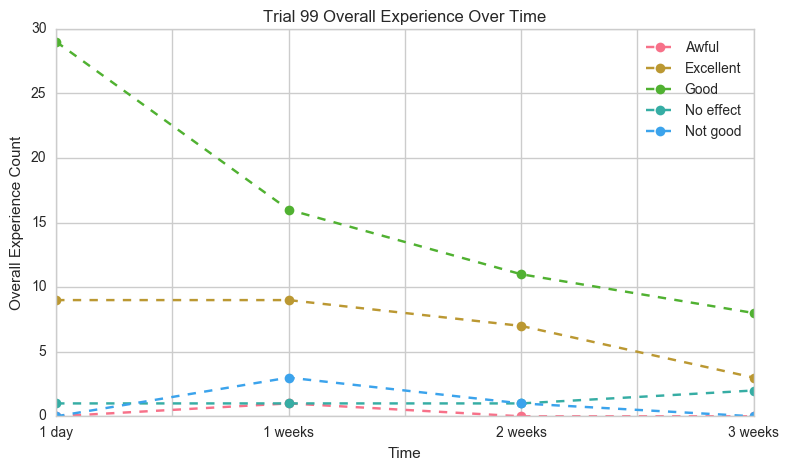

In [10]:
OE_overtime.plot(marker='o', figsize=(9,5), linestyle='--', )
plt.title('Trial 99 Overall Experience Over Time')
plt.xlabel('Time')
plt.ylabel('Overall Experience Count')
plt.legend()

2x2 contingency table between non-users and users that are likely to give a high or low rating.


The sample was grouped by the times the survey answers were collected at 1 day, 1 week, 2 week, 3 week. For each point of time, the data was then grouped by whether or not the user has tried the nootropic. This way, for each time point the data is independent. 

$H_{o}$ : There is no association between a user's status (if they are a nootropic user or not) and the overall experience rating they will likely give. 

$H_{A}$ : There is an association between a user's status and their overall experience rating. 


In [11]:
#mapping the Overall experience column by binary values of high or low rating given. 
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}

In [41]:
df_99['Overall_Exp_Rating'] = df_99['Overall_Experience'].map(rating)


## Is there an association between the time of survey collection and users giving a higher rating 

In [156]:
#is there an association between the period and people choosing to give a higher rating versus not 
cont_tab = pd.crosstab(index=df_99.Overall_Exp_Rating, columns=df_99.Version_Duration)
cont_tab

Version_Duration,1 day,1 weeks,2 weeks,3 weeks
Overall_Exp_Rating,,,,
High,38,25,18,11
Low,1,5,2,2


In [46]:
stats.chisquare(cont_tab)

Power_divergenceResult(statistic=array([ 35.1025641 ,  13.33333333,  12.8       ,   6.23076923]), pvalue=array([  3.12788663e-09,   2.60729633e-04,   3.46619351e-04,
         1.25549186e-02]))

## What is the shortest trial period? 

-Find users that have answered since day

-That number of users will be used as a total of surveys that should be answered hypothetically

-For each version duration, divide the number of users that answered to the overall experience by the number of total users. This will track how users have answered 





In [83]:
total_surveys = len(df_99[df_99.Version_Duration=='1 day']['Last_Name'].unique()) 
total_surveys
#a total of 39 users that answered day 1

39

In [60]:
df_99[df_99.Version_Duration=='1 day']['Last_Name'].unique()

array(['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7',
       'User8', 'User9', 'User10', 'User11', 'User12', 'User13', 'User14',
       'User15', 'User16', 'User17', 'User18', 'User19', 'User20',
       'User21', 'User22', 'User23', 'User24', 'User25', 'User26',
       'User27', 'User28', 'User29', 'User30', 'User31', 'User32',
       'User33', 'User34', 'User35', 'User37', 'User38', 'User39', 'User40'], dtype=object)

In [62]:
df_99[df_99.Version_Duration=='1 weeks']

,Start_Date,End_Date,Last_Name,Version_Duration,Sleep_Quality,Overall_Experience,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,...,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euhphoria_Joy_Happiness,Estimated_Effect_Duration,Upper_Effect_Duration,Lower_Effect_Duration,Current_User_Comparison,User_Status,Overall_Exp_Rating
0,2017-11-14 14:51:00,2017-11-14 14:52:00,User1,1 weeks,OK,Good,Improved,Improved,Improved,Improved,...,No effect,No effect,No effect,No effect,4-8,8.0,4.0,I am not a XNootropic user,Non-user,High
2,2017-11-17 05:50:00,2017-11-17 05:57:00,User2,1 weeks,OK,Not good,Improved,Improved,Less good,Less good,...,Improved,Improved,No effect,No effect,8+,12.0,8.0,This is less good than XNootropic,XNootropic User,Low
5,2017-11-10 07:43:00,2017-11-10 07:51:00,User3,1 weeks,OK,Excellent,Improved,No effect,Improved,Improved,...,Improved,No effect,No effect,No effect,4-8,8.0,4.0,This is better than XNootropic,XNootropic User,High
8,2017-11-09 01:23:00,2017-11-09 01:30:00,User4,1 weeks,Excellent,Excellent,Improved,No effect,Improved,Improved,...,Improved,Improved,Improved,Improved,8+,12.0,8.0,This is better than XNootropic,XNootropic User,High
10,2017-11-15 18:39:00,2017-11-15 18:45:00,User5,1 weeks,OK,Good,Improved,Improved,Improved,No effect,...,No effect,No effect,Improved,No effect,8+,12.0,8.0,This is less good than XNootropic,XNootropic User,High
14,2017-11-05 20:10:00,2017-11-05 20:16:00,User6,1 weeks,Poor,Good,Improved,No effect,Improved,Improved,...,Improved,No effect,Less good,No effect,4-8,8.0,4.0,This is about the same as XNootropic,XNootropic User,High
16,2017-11-13 12:23:00,2017-11-13 12:42:00,User7,1 weeks,Excellent,Good,No effect,Improved,No effect,Improved,...,Improved,No effect,Improved,Improved,8+,12.0,8.0,This is about the same as XNootropic,XNootropic User,High
20,2017-11-06 12:32:00,2017-11-06 12:36:00,User8,1 weeks,Excellent,Good,Improved,No effect,No effect,Improved,...,No effect,Improved,Improved,No effect,4-8,8.0,4.0,I am not a XNootropic user,Non-user,High
24,2017-11-05 08:49:00,2017-11-05 08:55:00,User10,1 weeks,OK,No effect,Less good,No effect,No effect,Less good,...,No effect,No effect,No effect,No effect,<2,2.0,0.0,I am not a XNootropic user,Non-user,Low
31,2017-11-06 06:23:00,2017-11-06 06:27:00,User13,1 weeks,Excellent,Excellent,Improved,Improved,Improved,Improved,...,Improved,Improved,Improved,Improved,4-8,8.0,4.0,This is better than XNootropic,XNootropic User,High


In [145]:
answered = df_99.groupby(['Version_Duration'])[['Overall_Experience']].count() 
#this is the number of users that have answered the survey for that question
#answered['Yes']=answered['Overall_Experience'] 
ans = answered.rename(columns={'Overall_Experience': 'Yes'})
ans

,Yes
Version_Duration,
1 day,39
1 weeks,30
2 weeks,20
3 weeks,13


In [115]:
(df_99.groupby(['Version_Duration'])[['Overall_Experience']].count()) / total_surveys
# this is the proportion of users that did answer the surveys 

,Overall_Experience
Version_Duration,
1 day,1.000000
1 weeks,0.769231
2 weeks,0.512821
3 weeks,0.333333


In [151]:
no_answer = total_surveys-answered
no_ans = no_answer.rename(columns={'Overall_Experience': 'No'})
no_ans

,No
Version_Duration,
1 day,0
1 weeks,9
2 weeks,19
3 weeks,26


In [192]:
survey = pd.concat([ans, no_ans],axis=1)
sur = survey.unstack(0).unstack()
sur

Version_Duration,1 day,1 weeks,2 weeks,3 weeks
Yes,39,30,20,13
No,0,9,19,26


In [193]:
stats.chisquare(sur)
#there is an association between the version duration and whether or not users answered surveys 

Power_divergenceResult(statistic=array([  3.90000000e+01,   1.13076923e+01,   2.56410256e-02,
         4.33333333e+00]), pvalue=array([  4.23805543e-10,   7.71866449e-04,   8.72780124e-01,
         3.73729883e-02]))

In [194]:
stats.power_divergence(sur, lambda_='log-likelihood')

Power_divergenceResult(statistic=array([  5.40654801e+01,   1.19295570e+01,   2.56438360e-02,
         4.41737496e+00]), pvalue=array([  1.93918320e-13,   5.52503140e-04,   8.72773211e-01,
         3.55747246e-02]))

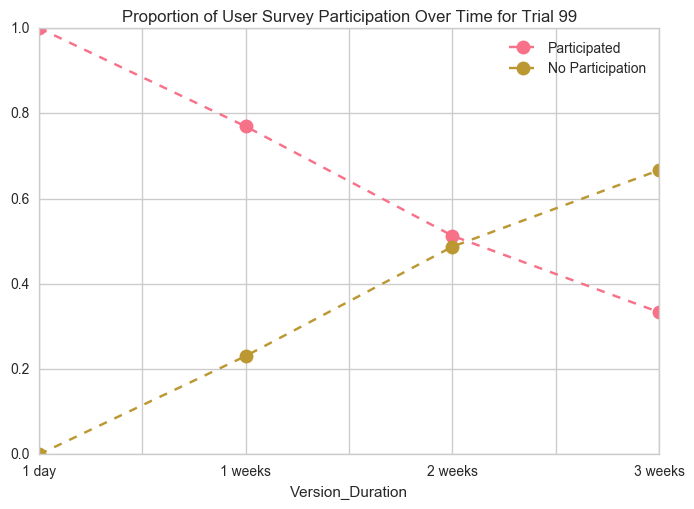

In [217]:
ax = ((df_99.groupby(['Version_Duration'])[['Overall_Experience']].count()) / total_surveys).plot(markersize=10,marker='o', linestyle='--', )
(no_answer / total_surveys).plot(marker='o', linestyle='--', markersize=10, ax=ax)
ax.legend(['Participated','No Participation'])
plt.title('Proportion of User Survey Participation Over Time for Trial 99')
plt.show()

In [ ]:
# Version 51


In [211]:
total_51 = len(df_51[df_51.Version_Duration=='1 day']['Last_Name'].unique()) 
total_51

42

In [213]:
answered_51 = df_51.groupby(['Version_Duration'])[['Overall_Experience']].count() 
answered_51

,Overall_Experience
Version_Duration,
1 day,42
1 weeks,40
2 weeks,31
3 weeks,20


In [215]:
no_ans51 = total_51 - answered_51 
no_ans51

,Overall_Experience
Version_Duration,
1 day,0
1 weeks,2
2 weeks,11
3 weeks,22


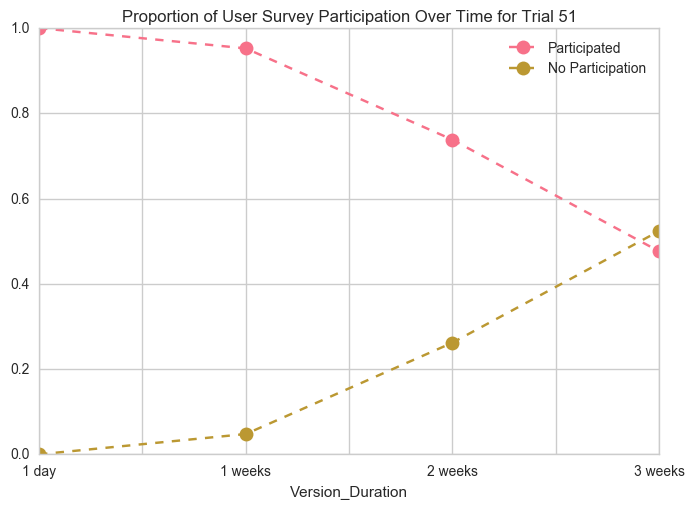

In [223]:
ax = ((df_51.groupby(['Version_Duration'])[['Overall_Experience']].count()) / total_51).plot(markersize=10,marker='o', linestyle='--', )
(no_ans51 / total_51).plot(marker='o', linestyle='--', markersize=10, ax=ax)
ax.legend(['Participated','No Participation'])
plt.title('Proportion of User Survey Participation Over Time for Trial 51')
plt.show()

Because the sample between the placebo group and the drug group are different, the samples are independent because the measurements are from different people.

However, the measurements within the sample are not independent though. 

$\hat{p}_{1}$ = The proportion of XNootropic users that had an "Excellent" overall experience

$\hat{p}_{2}$ = The proportion of Non-users that had an "Excellent" overall experience


$H_{o}$ : $\hat{p}_{1} = \hat{p}_{2}$ or $\hat{p}_{1} - \hat{p}_{2}$ = 0

$H_{A}$ : $\hat{p}_{1} > \hat{p}_{2}$



In [17]:
def twoporZtest (x1,x2, n1, n2):
    p1 = x1 / n1
    p2 = x2 / n2
    
    p_hat = (x1 + x2) / (n1 + n2)
    SEM = np.sqrt(p_hat* (1-p_hat) * ((1/n1) + (1/n2)))
    z = (p1-p2) / SEM
    p_val = stats.norm.sf(abs(z))
    diff_prop = p1-p2
    m = 1.96 * np.sqrt(  ((p1 * (1-p1))/n1)  +   ((p2 * (1-p2))/n2)    )
    CI = (diff_prop - m), (diff_prop + m)
    
    print ("z: {}".format(z))
    print ("p-value: {}".format(p_val))
    print ("CI: {}".format(CI))
    print ("proportion difference: {}".format(diff_prop))
    print ("p1: {}".format(p1))
    print ("p2: {}".format(p2))


## Trial 51:


$\hat{p}_{1}$ = The proportion of XNootropic users that had an "Excellent" overall experience

$\hat{p}_{2}$ = The proportion of Non-users that had an "Excellent" overall experience


$H_{o}$ : $\hat{p}_{1} = \hat{p}_{2}$ or $\hat{p}_{1} - \hat{p}_{2}$ = 0

$H_{A}$ : $\hat{p}_{1} > \hat{p}_{2}$


In [ ]:
T51_cont_table1 = pd.crosstab(index=df_51.Overall_Experience, columns=df_51.User_Status, margins=True)
T51_cont_table1

In [ ]:
twoporZtest(42, 7, 96, 30)

## Comparing between the two trials


$\hat{p}_{1}$ = The proportion of Trial 99 users that had an "Excellent" overall experience

$\hat{p}_{2}$ = The proportion of Trial 51 that had an "Excellent" overall experience


$H_{o}$ : $\hat{p}_{1} = \hat{p}_{2}$ or $\hat{p}_{1} - \hat{p}_{2}$ = 0

$H_{A}$ : $\hat{p}_{1} > \hat{p}_{2}$
